# Rank-Revealing QR

Copyright (C) 2026 Andreas Kloeckner

<details>
<summary>MIT License</summary>
Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in
all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.
</details>

**Note:** `scipy.linalg`, not `numpy.linalg`!

In [39]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as pt
from random import randrange

## Obtain a low-rank matrix

In [60]:
n = 100
A0 = np.random.randn(n, n)
U0, sigma0, VT0 = la.svd(A0)
print(la.norm((U0*sigma0)@VT0 - A0))

sigma = np.exp(-np.arange(n))

A = (U0 * sigma).dot(VT0)

# Experiment: turn this on and off
for _i in range(n//3):
    i, j = randrange(0, n), randrange(0, n)
    A[i,j] = 15

2.203435127001163e-13


## Run vanilla QR

In [61]:
Q, R = la.qr(A)

In [62]:
la.norm(A - Q@R, 2)

np.float64(2.3065685982308308e-14)

In [63]:
la.norm(Q@Q.T - np.eye(n))

np.float64(8.149851810778503e-15)

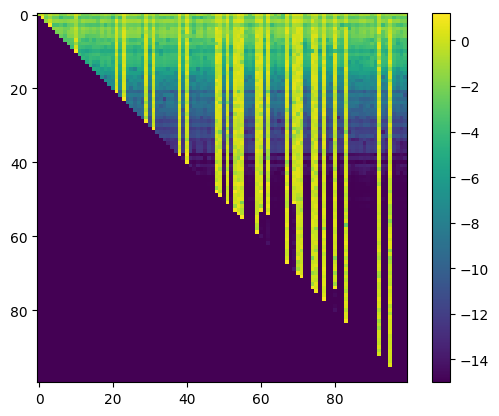

In [64]:
pt.imshow(np.log10(1e-15+np.abs(R)))
pt.colorbar()

## Run the pivoted factorization

In [65]:
Q, R, perm = la.qr(A, pivoting=True)

Compute the QR factorization with `pivoting=True`, storing the result in `Q`, `R`, and `perm`:

In [66]:
#clear
Q, R, perm = la.qr(A, pivoting=True)

First of all, check that we've obtained a valid factorization

In [67]:
la.norm(A[:, perm] - Q@R, 2)

np.float64(1.3360575383107692e-14)

In [68]:
la.norm(Q@Q.T - np.eye(n))

np.float64(7.874932444087291e-15)

Next, examine $R$:

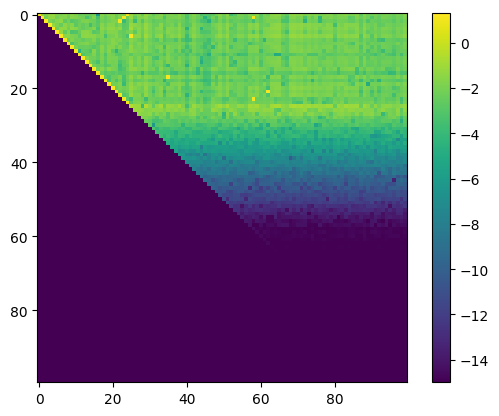

In [69]:
pt.imshow(np.log10(1e-15+np.abs(R)))
pt.colorbar()

Specifically, recall that the diagonal of $R$ in QR contains column norms:

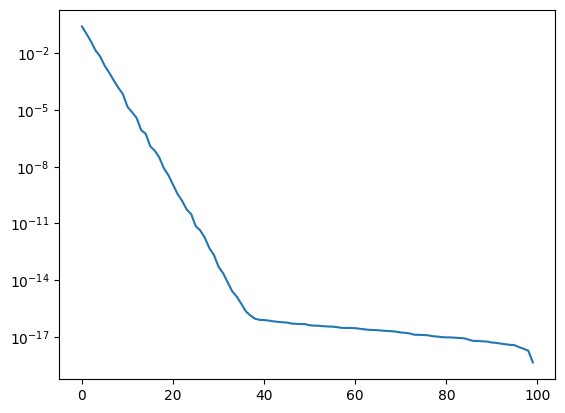

In [7]:
pt.semilogy(np.abs(np.diag(R)))

* In the case of `scipy`'s transform, diagonal entries of $R$ are guaranteed non-increasing.
* But there is a whole science to how to choose the permutations (or other source vectors)
    * and what promises one is able to make as a result of that